# Flower recognition model using CNN

### Importing necessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv

import os
import random
import warnings
warnings.filterwarnings('ignore')

### Loading training and test data along with target values

In [2]:
# Creating training data as a numpy array

X_train_daisy = np.array([cv.imread('flowers/training_set/daisy/'+i) for i in os.listdir('flowers/training_set/daisy')])

X_train_dandelion = np.array([cv.imread('flowers/training_set/dandelion/'+i) for i in os.listdir('flowers/training_set/dandelion')])

X_train_rose = np.array([cv.imread('flowers/training_set/rose/'+i) for i in os.listdir('flowers/training_set/rose')])

X_train_sunflower = np.array([cv.imread('flowers/training_set/sunflower/'+i) for i in os.listdir('flowers/training_set/sunflower')])

X_train_tulip = np.array([cv.imread('flowers/training_set/tulip/'+i) for i in os.listdir('flowers/training_set/tulip')])

# Encoding target labels 
categories = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
encoder = LabelEncoder()
categories = encoder.fit(categories)

In [3]:
# Combining all the training data
X_train = np.concatenate((X_train_daisy, X_train_dandelion, X_train_rose, X_train_sunflower, X_train_tulip), axis=0)

# Converting BGR to RGB for all the images in X_train
X_train = np.array([cv.cvtColor(i, cv.COLOR_BGR2RGB) for i in X_train])

# Resizing the images in X_train to 224x224
X_train = np.array([cv.resize(i, (224, 224), interpolation=cv.INTER_CUBIC) for i in X_train])

print(X_train.shape)
print(X_train)

(3614, 224, 224, 3)
[[[[213 216 224]
   [207 213 219]
   [208 210 218]
   ...
   [  6   7  11]
   [  9   8  12]
   [  7   7  12]]

  [[215 220 228]
   [219 223 230]
   [217 216 224]
   ...
   [ 11  12  16]
   [ 15  13  18]
   [  8   9  13]]

  [[218 220 227]
   [217 217 225]
   [223 226 233]
   ...
   [  7   6  11]
   [  3   4   9]
   [  7   8  12]]

  ...

  [[202 208 212]
   [208 213 217]
   [219 227 230]
   ...
   [176 168 155]
   [185 175 166]
   [177 166 161]]

  [[224 228 232]
   [228 230 238]
   [220 228 233]
   ...
   [177 169 157]
   [182 172 161]
   [173 165 157]]

  [[231 233 240]
   [227 231 238]
   [229 233 239]
   ...
   [176 167 152]
   [184 170 161]
   [172 157 155]]]


 [[[137 131 119]
   [132 129 116]
   [127 128 114]
   ...
   [164 167 140]
   [159 167 139]
   [148 161 133]]

  [[135 131 119]
   [123 122 110]
   [112 114 101]
   ...
   [183 186 164]
   [137 144 120]
   [131 143 120]]

  [[130 128 120]
   [116 117 108]
   [103 105  96]
   ...
   [153 156 139]
   [127 

In [4]:
# Creating target labels for training data

Y_train_daisy = np.array(['daisy' for i in range(len(X_train_daisy))])
Y_train_dandelion = np.array(['dandelion' for i in range(len(X_train_dandelion))])
Y_train_rose = np.array(['rose' for i in range(len(X_train_rose))])
Y_train_sunflower = np.array(['sunflower' for i in range(len(X_train_sunflower))])
Y_train_tulip = np.array(['tulip' for i in range(len(X_train_tulip))])

# Combining all the target labels
Y_train_classes = np.concatenate((Y_train_daisy, Y_train_dandelion, Y_train_rose, Y_train_sunflower, Y_train_tulip), axis=0)

# Encoding target labels
Y_train = encoder.transform(Y_train_classes)
print(Y_train)

[0 0 0 ... 4 4 4]


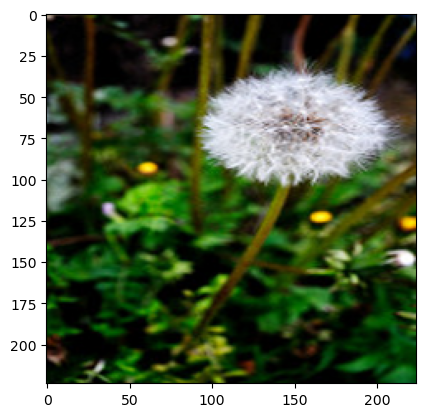

dandelion 1


In [5]:
# Check random image and its label
plt.imshow(X_train[1200])
plt.show()
print(Y_train_classes[1200], end=' ')
print(Y_train[1200])

In [6]:
# Creating validation data as a numpy array

X_test_daisy = np.array([cv.imread('flowers/test_set/daisy/'+i) for i in os.listdir('flowers/test_set/daisy')])

X_test_dandelion = np.array([cv.imread('flowers/test_set/dandelion/'+i) for i in os.listdir('flowers/test_set/dandelion')])

X_test_rose = np.array([cv.imread('flowers/test_set/rose/'+i) for i in os.listdir('flowers/test_set/rose')])

X_test_sunflower = np.array([cv.imread('flowers/test_set/sunflower/'+i) for i in os.listdir('flowers/test_set/sunflower')])

X_test_tulip = np.array([cv.imread('flowers/test_set/tulip/'+i) for i in os.listdir('flowers/test_set/tulip')])

# Combining all the validation data
X_test = np.concatenate((X_test_daisy, X_test_dandelion, X_test_rose, X_test_sunflower, X_test_tulip), axis=0)

# Converting BGR to RGB for all the images in X_test
X_test = np.array([cv.cvtColor(i, cv.COLOR_BGR2RGB) for i in X_test])

# Resizing the images in X_test to 224x224
X_test = np.array([cv.resize(i, (224, 224), interpolation=cv.INTER_CUBIC) for i in X_test])

print(X_test.shape)

(701, 150, 150, 3)


In [7]:
# Creating target labels for validation data
Y_test_daisy = np.array(['daisy' for i in range(len(X_test_daisy))])
Y_test_dandelion = np.array(['dandelion' for i in range(len(X_test_dandelion))])
Y_test_rose = np.array(['rose' for i in range(len(X_test_rose))])
Y_test_sunflower = np.array(['sunflower' for i in range(len(X_test_sunflower))])
Y_test_tulip = np.array(['tulip' for i in range(len(X_test_tulip))])

# Combining all the target labels
Y_test_classes = np.concatenate((Y_test_daisy, Y_test_dandelion, Y_test_rose, Y_test_sunflower, Y_test_tulip), axis=0)
print(Y_test_classes.shape)

# Encoding target labels
Y_test = encoder.transform(Y_test_classes)
print(Y_test.shape)

(701,)
(701,)


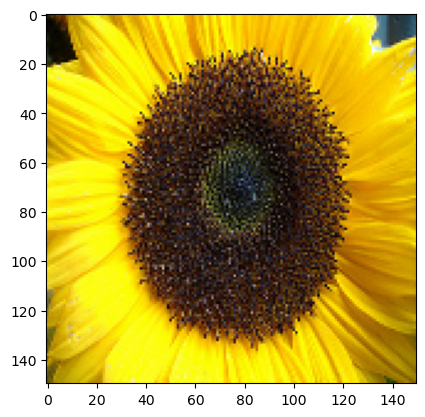

sunflower 3


In [8]:
# Check random image and its label

plt.imshow(X_test[510])
plt.show()
print(Y_test_classes[510], end=' ')
print(Y_test[510])

In [9]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(3614, 224, 224, 3) (3614,) (701, 150, 150, 3) (701,)
